In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
heart = pd.read_csv('heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<AxesSubplot: xlabel='Age', ylabel='Count'>

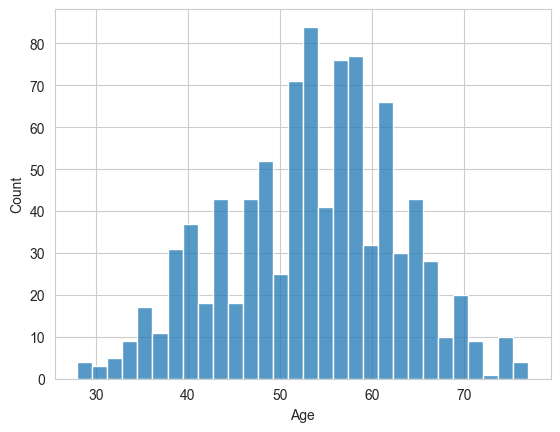

In [5]:
sns.set_style("whitegrid")
sns.histplot(heart['Age'], bins = 30)

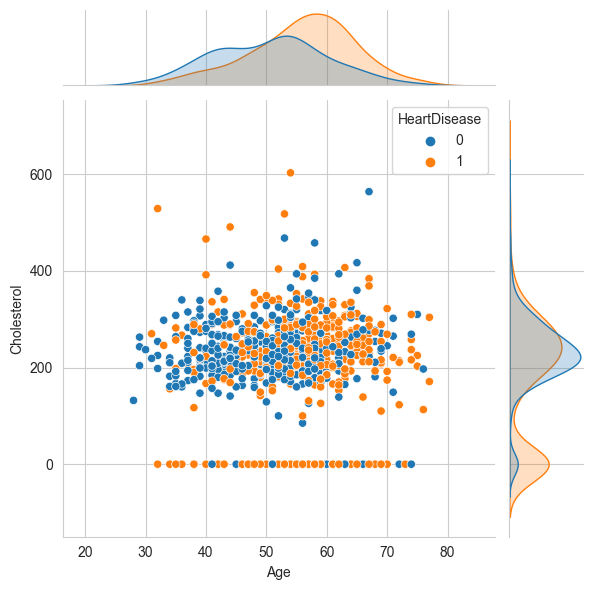

In [6]:
sns.jointplot(x='Age', y='Cholesterol', data=heart, hue='HeartDisease')

In [7]:
heart = heart[heart['Cholesterol']!=0]
heart = heart[heart['RestingBP']!=0]

In [8]:
heart['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

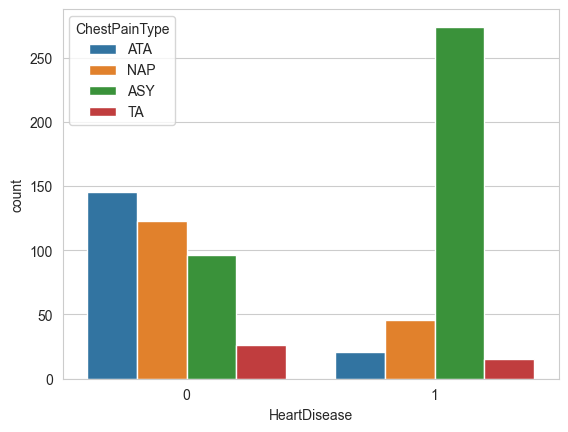

In [9]:
sns.countplot(x='HeartDisease', hue='ChestPainType', data=heart)

In [10]:
def numeric_pain(col):
    ChestPainType = col[0]
    if ChestPainType == 'ATA':
        return 0
    elif ChestPainType == 'NAP':
        return 1
    elif ChestPainType == 'ASY':
        return 2
    else:
        return 3

In [11]:
heart['ChestPainType'] = heart[['ChestPainType']].apply(numeric_pain, axis=1)

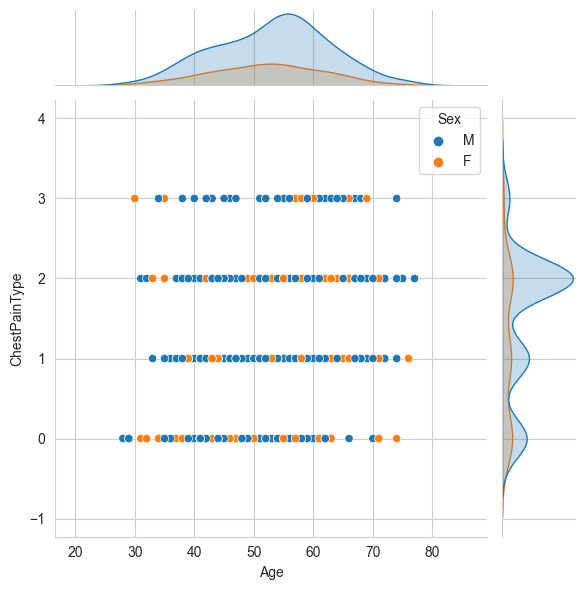

In [12]:
sns.jointplot(x='Age', y='ChestPainType', hue='Sex', data=heart)

In [13]:
heart['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [14]:
def numeric_ECG(col):
    RestingECG = col[0]
    if RestingECG == 'Normal':
        return 0
    elif RestingECG == 'ST':
        return 1
    else:
        return 2

In [15]:
heart['RestingECG'] = heart[['RestingECG']].apply(numeric_ECG, axis=1)

In [16]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,0,140,289,0,0,172,N,0.0,Up,0
1,49,F,1,160,180,0,0,156,N,1.0,Flat,1
2,37,M,0,130,283,0,1,98,N,0.0,Up,0
3,48,F,2,138,214,0,0,108,Y,1.5,Flat,1
4,54,M,1,150,195,0,0,122,N,0.0,Up,0


In [17]:
heart['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [18]:
def numeric_Angina(col):
    ExerciseAngina = col[0]
    if ExerciseAngina == 'N':
        return 0
    else:
        return 1

In [19]:
heart['ExerciseAngina'] = heart[['ExerciseAngina']].apply(numeric_Angina, axis=1)

In [20]:
heart['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [21]:
def numeric_ST(col):
    ST_Slope = col[0]
    if ST_Slope == 'Down':
        return -1
    elif ST_Slope == 'Flat':
        return 0
    else:
        return 1

In [22]:
heart['ST_Slope'] = heart[['ST_Slope']].apply(numeric_ST, axis=1)

In [23]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,0,140,289,0,0,172,0,0.0,1,0
1,49,F,1,160,180,0,0,156,0,1.0,0,1
2,37,M,0,130,283,0,1,98,0,0.0,1,0
3,48,F,2,138,214,0,0,108,1,1.5,0,1
4,54,M,1,150,195,0,0,122,0,0.0,1,0


In [24]:
heart.corr()

/var/folders/gn/1mhhyw1x3k5bfmb4tnrrjt5c0000gn/T/ipykernel_84081/1516287138.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heart.corr()


,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.238372,0.259865,0.058758,0.241338,0.230374,-0.382112,0.245908,0.286006,-0.285421,0.298617
ChestPainType,0.238372,1.000000,0.113377,0.034241,0.097147,0.147663,-0.275872,0.359181,0.358451,-0.381494,0.442023
RestingBP,0.259865,0.113377,1.000000,0.095939,0.173765,0.062151,-0.125774,0.161035,0.198575,-0.143881,0.173242
Cholesterol,0.058758,0.034241,0.095939,1.000000,0.054012,0.067802,-0.019856,0.086768,0.058488,-0.078516,0.103866
FastingBS,0.241338,0.097147,0.173765,0.054012,1.000000,0.133075,-0.102710,0.109995,0.055568,-0.157780,0.160594
RestingECG,0.230374,0.147663,0.062151,0.067802,0.133075,1.000000,0.025448,0.047632,0.125211,-0.108808,0.113261
MaxHR,-0.382112,-0.275872,-0.125774,-0.019856,-0.102710,0.025448,1.000000,-0.396289,-0.259533,0.349926,-0.377212
ExerciseAngina,0.245908,0.359181,0.161035,0.086768,0.109995,0.047632,-0.396289,1.000000,0.465491,-0.473543,0.551834
Oldpeak,0.286006,0.358451,0.198575,0.058488,0.055568,0.125211,-0.259533,0.465491,1.000000,-0.613961,0.495696
ST_Slope,-0.285421,-0.381494,-0.143881,-0.078516,-0.157780,-0.108808,0.349926,-0.473543,-0.613961,1.000000,-0.597334


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(heart.drop(['HeartDisease', 'Sex'], axis = 1), heart['HeartDisease'], test_size = 0.3)

In [26]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
predictions = logmodel.predict(X_test)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       114
           1       0.85      0.85      0.85       110

    accuracy                           0.85       224
   macro avg       0.85      0.85      0.85       224
weighted avg       0.85      0.85      0.85       224

